# Heart Disease Prediction

This dataset contains **13 features**, based on which we can predict whether a particular person has a heart disease or not.

The features and their description are as follows:
1) **age**: The person's age in years
2) **sex**: The person's sex (1 = male, 0 = female)
3) **cp**: chest pain type (0 = asymptomatic, 1 = atypical angina, 2 = non-anginal pain, 3 = typical angina)
4) **trestbps**: The person's resting blood pressure in mm Hg
5) **chol**: The person's cholesterol measurement in mg/dl
6) **fbs**: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
7) **restecg**: Resting electrocardiographic results (0 = showing probable or definite left ventricular hypertrophy by Estes' criteria, 1 = normal, 2 = having ST-T wave abnormality)
8) **thalach**: The person's maximum heart rate achieved
9) **exang**: Exercise induced angina (1 = yes, 0 = no)
10) **oldpeak**: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot)
11) **slope**: The slope of the peak exercise ST segment (0 = downsloping, 1 = flat, 2 = upsloping)
12) **ca**: The number of major vessels (0-3)
13) **thal**: Results of the blood flow observed via the radioactive dye (0 = NULL, 1 = fixed defect, 2 = normal blood flow, 3 = reversible defect)
14) **target**: Heart disease (0 = no, 1 = yes)

### Load Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')
%matplotlib inline

### Load Dataset

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


### Exploratory Data Analysis

In [5]:
df.shape

(1025, 14)

In [6]:
#renaming the columns for convenience
df.rename(columns={'cp': 'chestpain', 'trestbps': 'restingbp', 'fbs': 'fastingbs', 'thalach': 'heartrate',
                  'ca': 'vessels'}, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1025 non-null   int64  
 1   sex        1025 non-null   int64  
 2   chestpain  1025 non-null   int64  
 3   restingbp  1025 non-null   int64  
 4   chol       1025 non-null   int64  
 5   fastingbs  1025 non-null   int64  
 6   restecg    1025 non-null   int64  
 7   heartrate  1025 non-null   int64  
 8   exang      1025 non-null   int64  
 9   oldpeak    1025 non-null   float64
 10  slope      1025 non-null   int64  
 11  vessels    1025 non-null   int64  
 12  thal       1025 non-null   int64  
 13  target     1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
df.describe()

,age,sex,chestpain,restingbp,chol,fastingbs,restecg,heartrate,exang,oldpeak,slope,vessels,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
#checking for null values
df.isnull().sum()

age          0
sex          0
chestpain    0
restingbp    0
chol         0
fastingbs    0
restecg      0
heartrate    0
exang        0
oldpeak      0
slope        0
vessels      0
thal         0
target       0
dtype: int64

In [10]:
df[["age", "restingbp", "chol", "heartrate"]] = df[["age", "restingbp", "chol", "heartrate"]].replace(0, np.NaN)

In [11]:
df.isnull().sum()

age          0
sex          0
chestpain    0
restingbp    0
chol         0
fastingbs    0
restecg      0
heartrate    0
exang        0
oldpeak      0
slope        0
vessels      0
thal         0
target       0
dtype: int64

So there are no null values present.

In [12]:
df.dtypes

age            int64
sex            int64
chestpain      int64
restingbp      int64
chol           int64
fastingbs      int64
restecg        int64
heartrate      int64
exang          int64
oldpeak      float64
slope          int64
vessels        int64
thal           int64
target         int64
dtype: object

In [13]:
#changing the datatype of categorical variables
columns = ["sex", "chestpain", "fastingbs", "restecg", "exang", "slope", "vessels", "thal"]

for col in columns:
    df[col] = df[col].astype("category")

In [14]:
df.dtypes

age             int64
sex          category
chestpain    category
restingbp       int64
chol            int64
fastingbs    category
restecg      category
heartrate       int64
exang        category
oldpeak       float64
slope        category
vessels      category
thal         category
target          int64
dtype: object

In [15]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [16]:
#max and min age
print("MAX AGE:", df['age'].max())
print("MIN AGE:", df['age'].min())

MAX AGE: 77
MIN AGE: 29


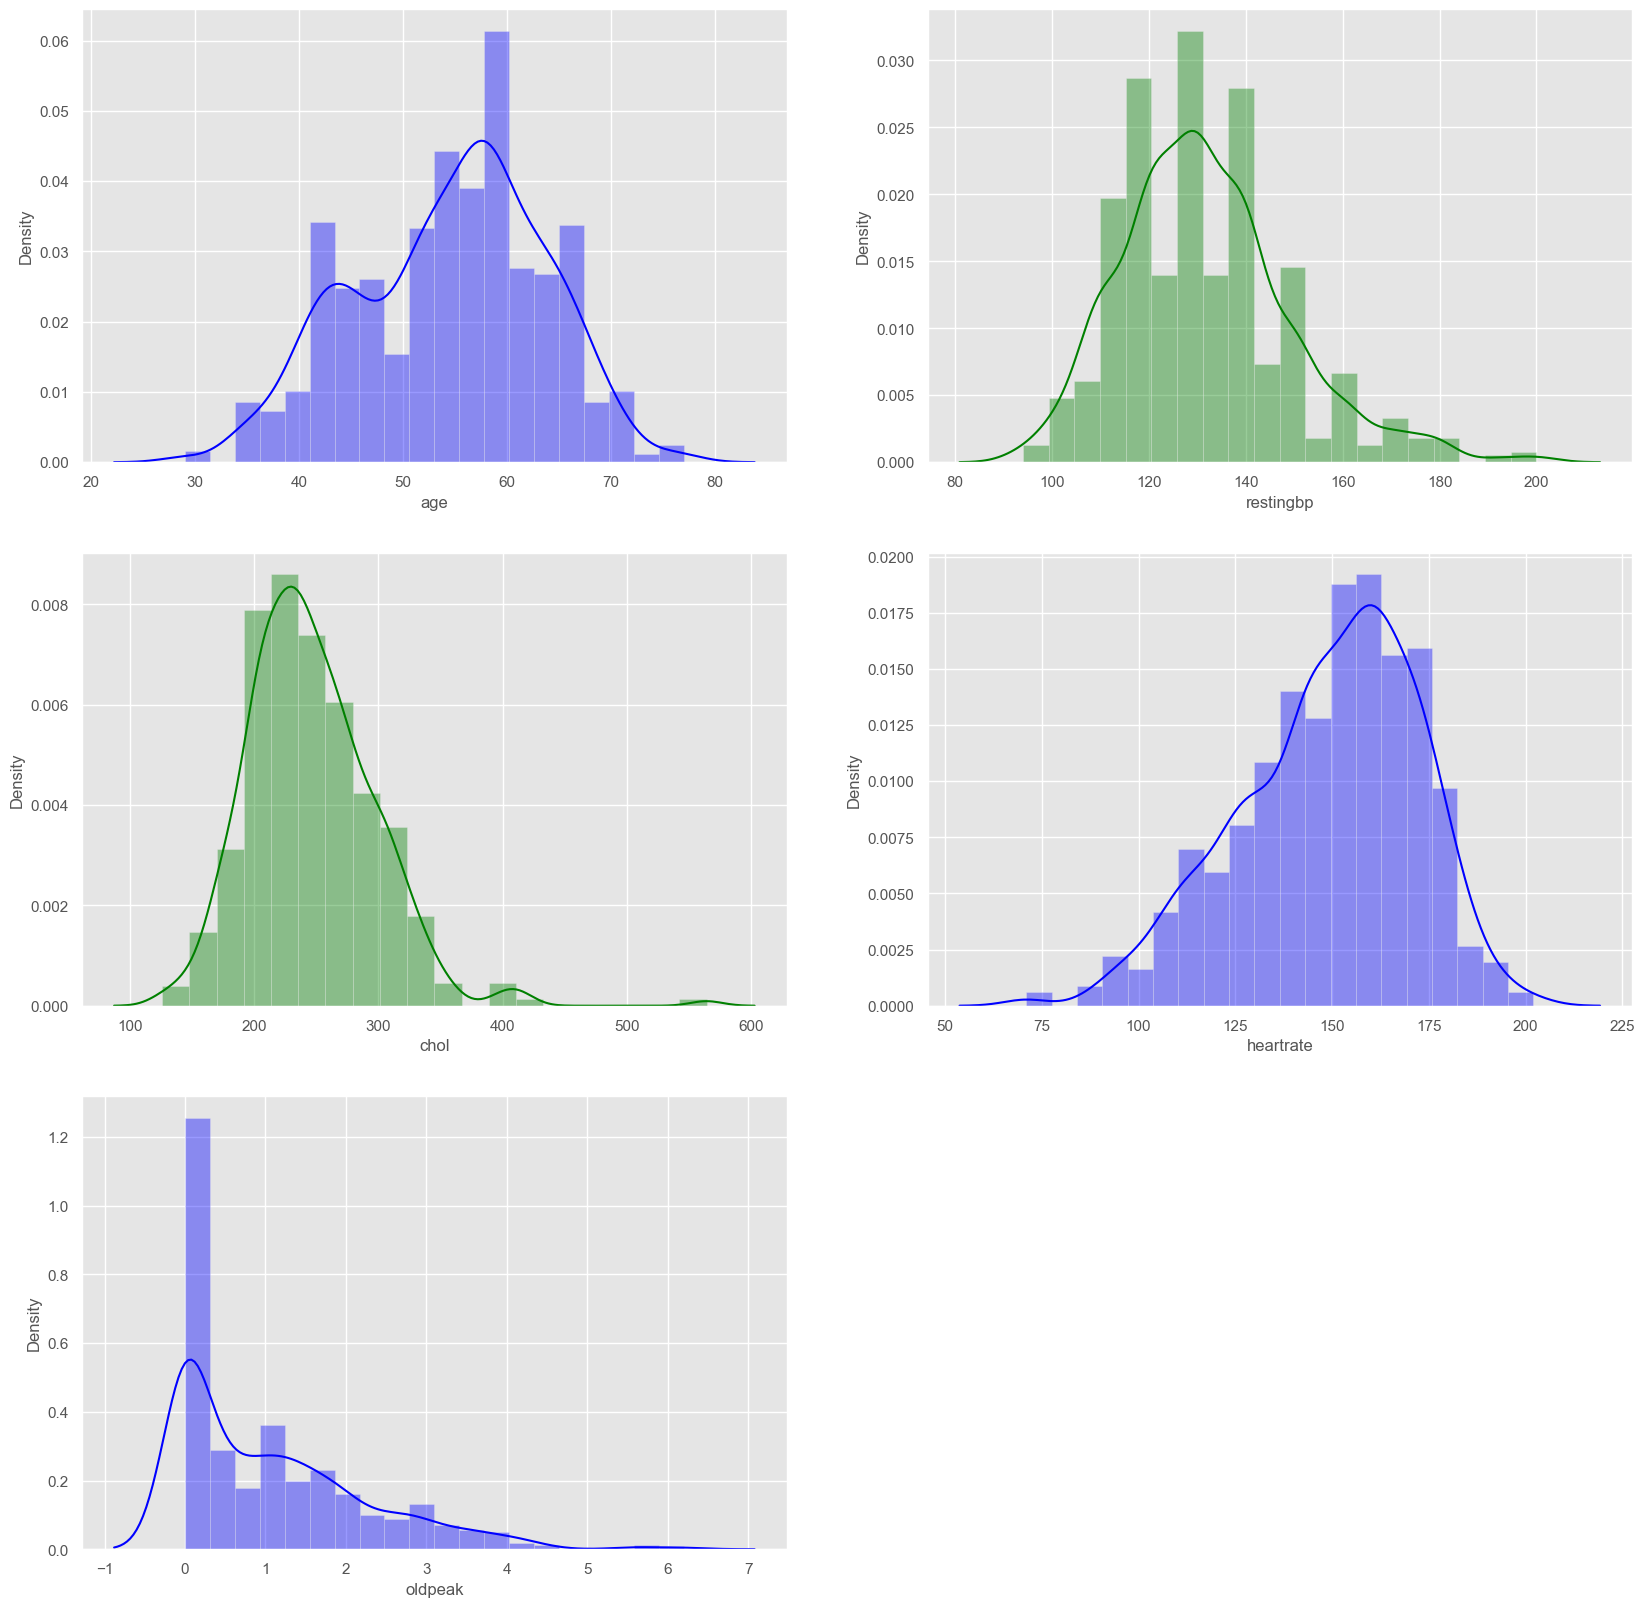

In [17]:
#plotting distribution plot for numerical variables

fig,ax = plt.subplots(3,2, figsize=(20,20))
sns.distplot(df.age, bins=20, ax=ax[0,0], color="blue")
sns.distplot(df.restingbp, bins=20, ax=ax[0,1], color="green")
sns.distplot(df.chol, bins=20, ax=ax[1,0], color="green")
sns.distplot(df.heartrate, bins=20, ax=ax[1,1], color="blue")
sns.distplot(df.oldpeak, bins=20, ax=ax[2,0], color="blue")
fig.delaxes(ax[2][1])

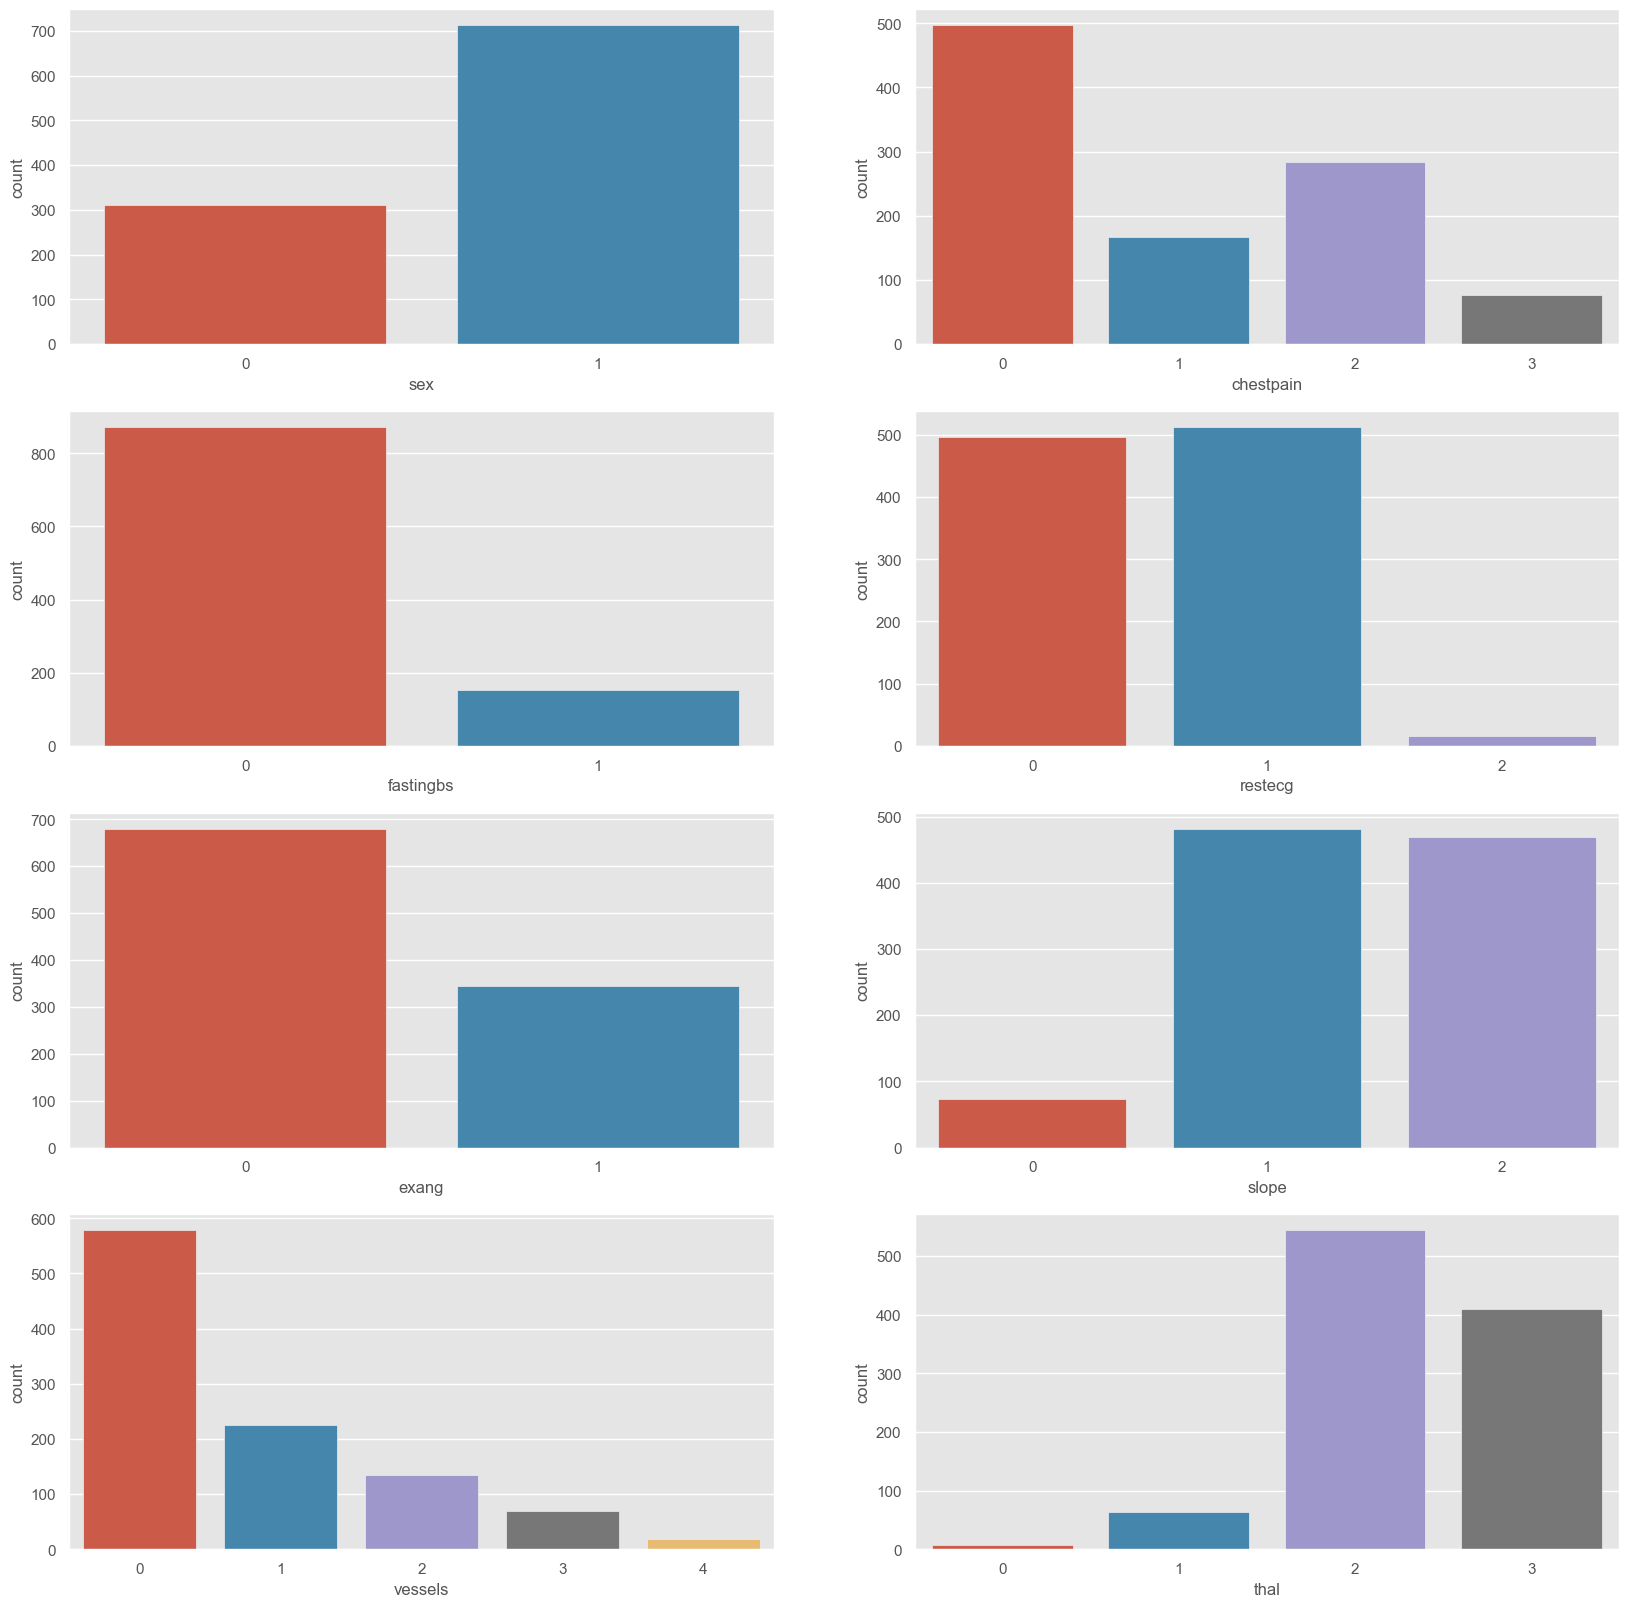

In [18]:
#plotting distribution plot for categorical variables

fig, ax = plt.subplots(4,2, figsize=(20,20))

cols = df.select_dtypes(include='category').columns
for i, ax in enumerate(ax.flatten()):
    sns.countplot(data=df, x=cols[i], ax=ax)

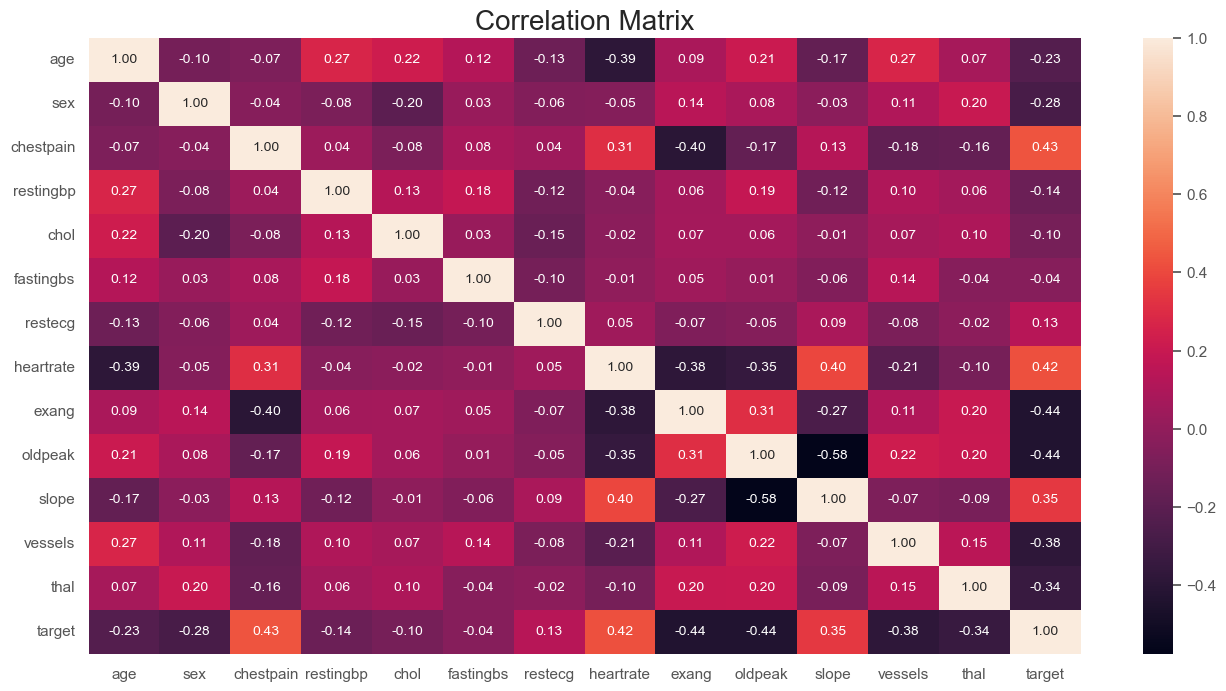

In [19]:
#correlation matrix

fig, ax = plt.subplots(figsize=[16,8])
sns.heatmap(df.corr(), annot=True, fmt = '.2f', ax=ax)
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

### Outlier Detection

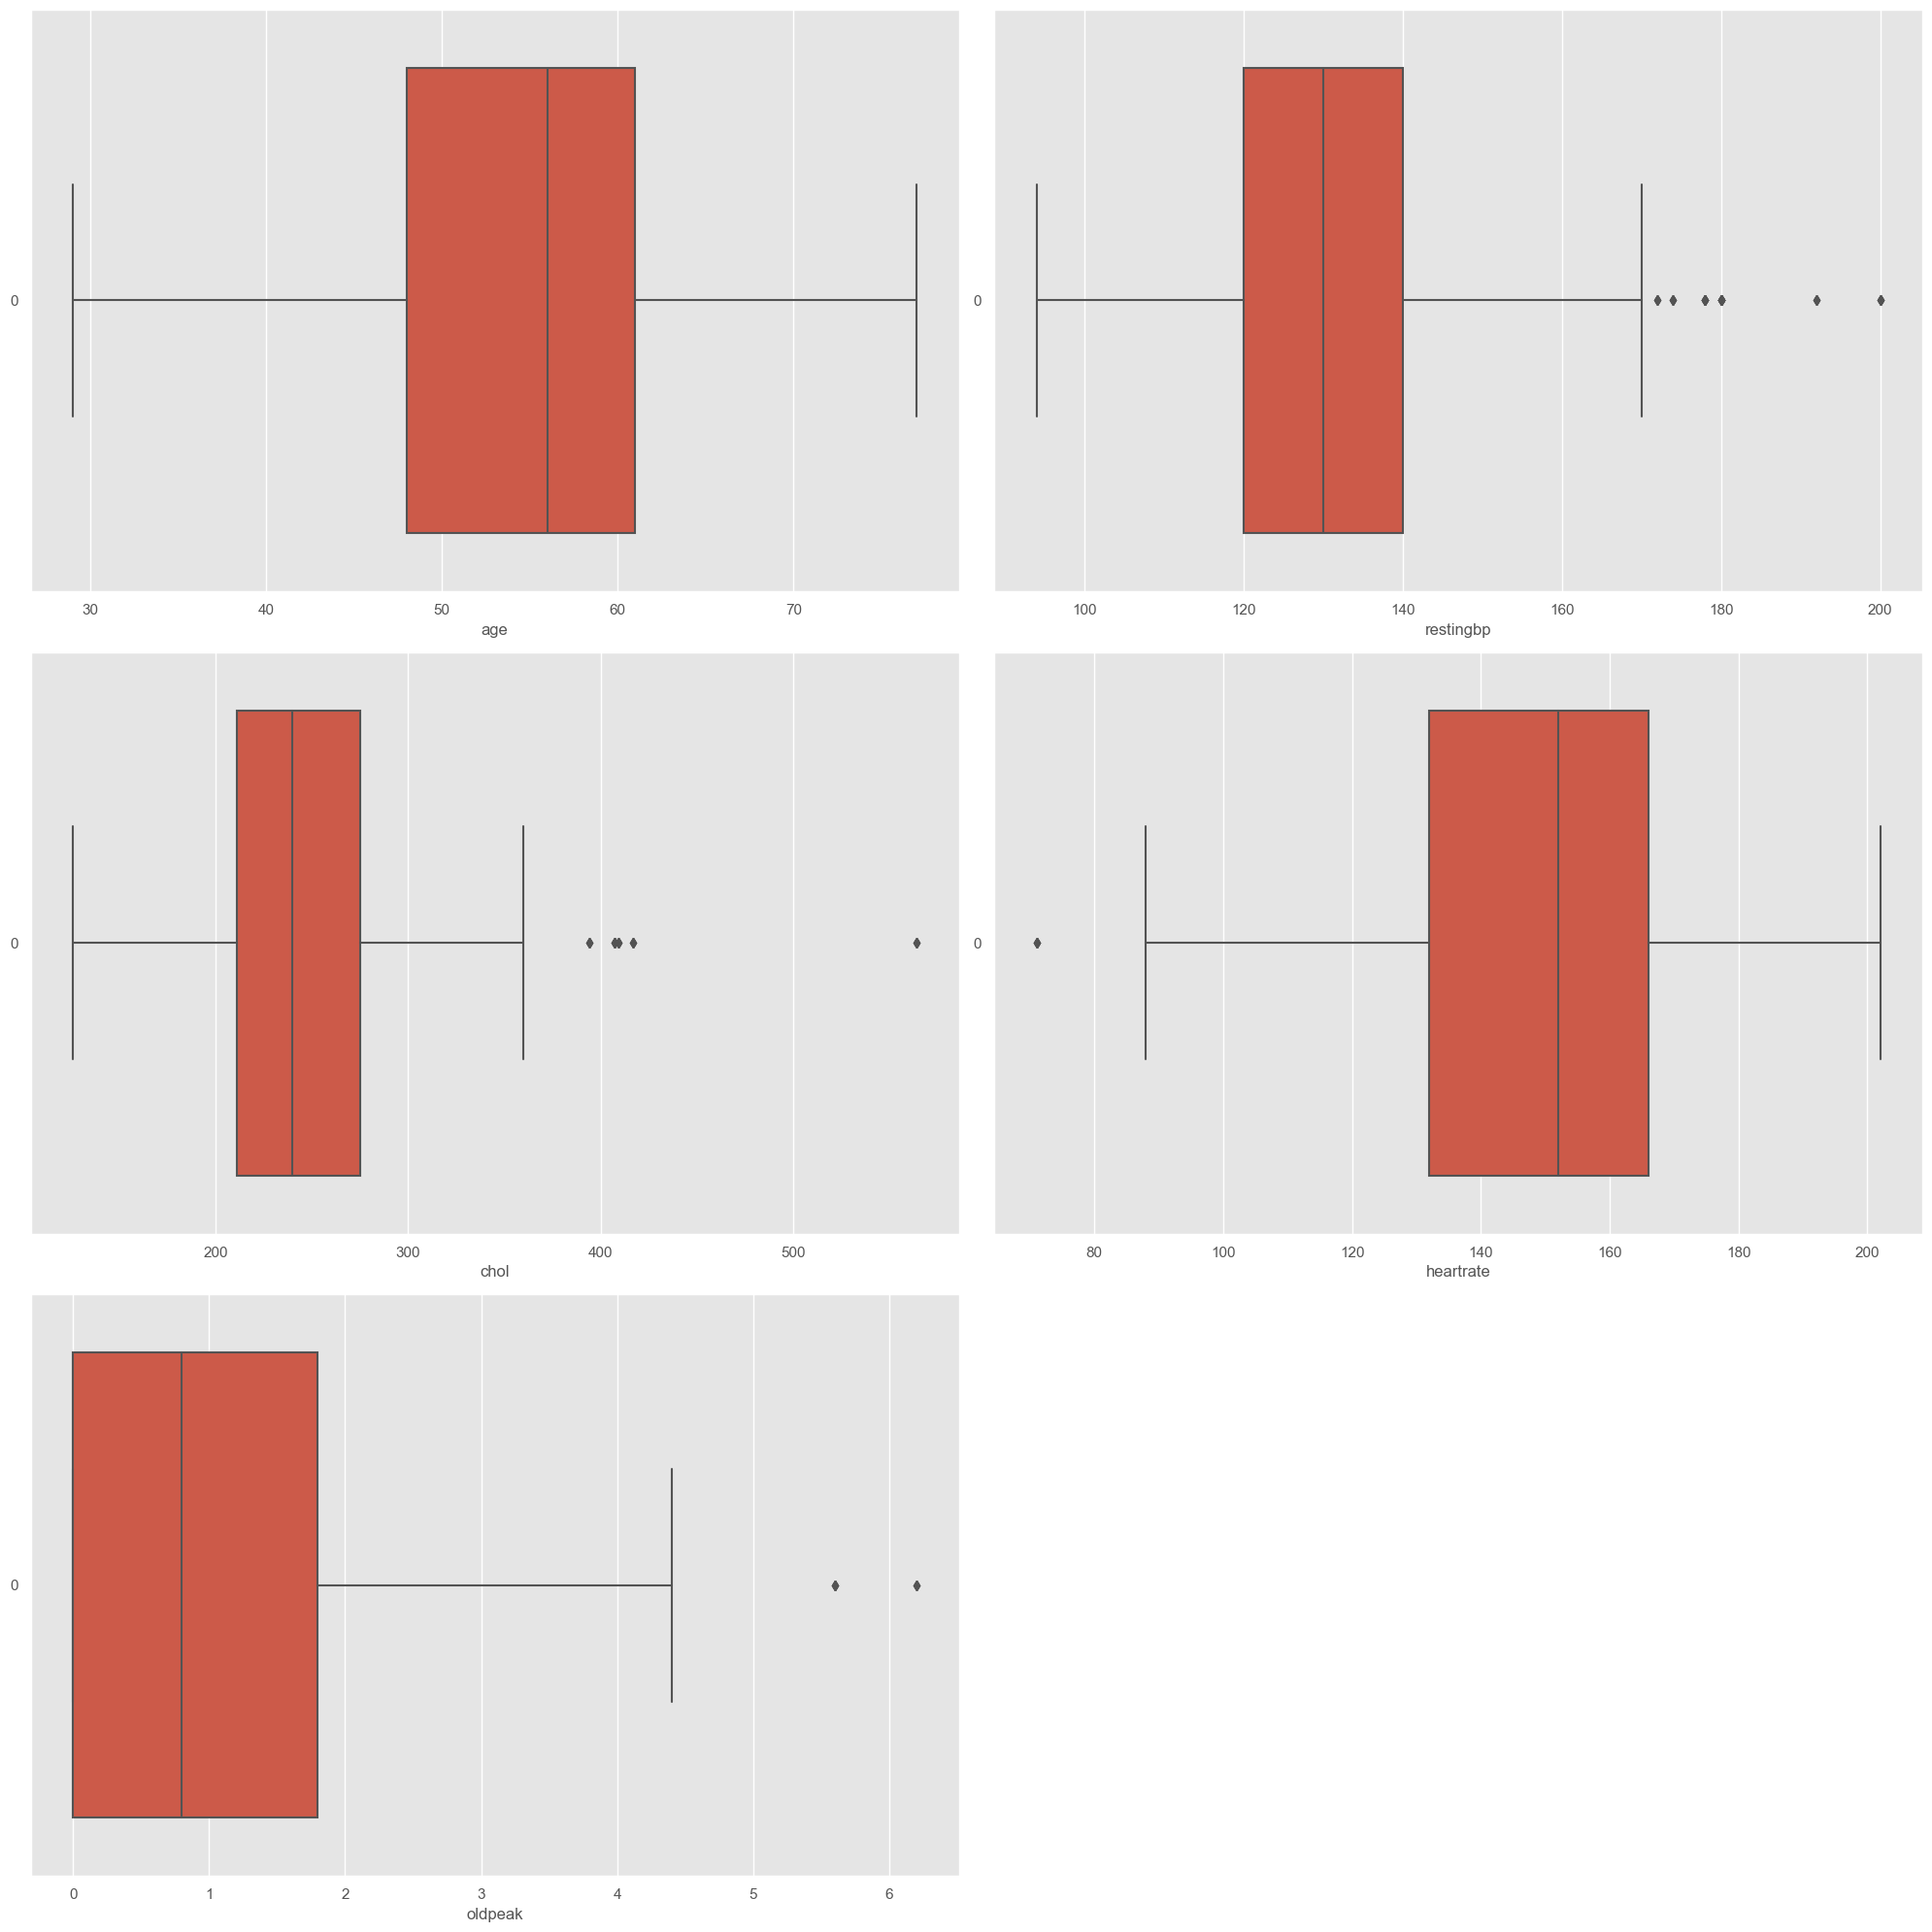

In [20]:
cols = ["age", "restingbp", "chol", "heartrate", "oldpeak"]
plt.figure(figsize = (20, 20))
plotnumber = 1
for column in cols:
    if plotnumber <= 5:
        ax = plt.subplot(3, 2, plotnumber)
        sns.boxplot(df[column], orient="h")
        plt.xlabel(column)
    plotnumber += 1

plt.tight_layout()
plt.show()

In [21]:
#removing outliers

columns = ["restingbp", "chol", "heartrate", "oldpeak"]
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    median_val = df[col].median()
    df.loc[(df[col]>upper) | (df[col]<lower), col] = median_val

In [22]:
df.head()

,age,sex,chestpain,restingbp,chol,fastingbs,restecg,heartrate,exang,oldpeak,slope,vessels,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Train Test Split

In [23]:
X = df.drop('target', axis=1)
y = df['target']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

In [25]:
#scaling the features
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

transformer = ColumnTransformer(transformers=[
    ('sc', StandardScaler(), ["age", "restingbp", "chol", "heartrate", "oldpeak"]),
],remainder='passthrough')

In [26]:
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [27]:
X_train.shape

(820, 13)

In [28]:
X_test.shape

(205, 13)

### Model Training

### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [30]:
y_pred = lr.predict(X_test)

In [31]:
#checking accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#on train set
accuracy_score(y_train, lr.predict(X_train))

0.8621951219512195

In [32]:
#on test set
lr_acc = accuracy_score(y_test, y_pred)
lr_acc

0.8048780487804879

In [33]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[75, 27],
       [13, 90]], dtype=int64)

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79       102
           1       0.77      0.87      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



### KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [36]:
y_pred = knn.predict(X_test)

In [37]:
#accuracy on train set
accuracy_score(y_train, knn.predict(X_train))

0.9439024390243902

In [38]:
#accuracy on test set
knn_acc = accuracy_score(y_test, y_pred)
knn_acc

0.8048780487804879

In [39]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[78, 24],
       [16, 87]], dtype=int64)

In [40]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.76      0.80       102
           1       0.78      0.84      0.81       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



### SVM

In [41]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC(probability=True)
parameter = {
    "gamma":[0.0001, 0.001, 0.01, 0.1],
    'C': [0.01, 0.05,0.5, 0.01, 1, 10, 15, 20]
}
grid_search = GridSearchCV(svc, parameter, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.5, 0.01, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [42]:
#best parameter
grid_search.best_params_

{'C': 20, 'gamma': 0.1}

In [43]:
svc = SVC(C=20, gamma = 0.1, probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [44]:
#accuracy on train set
accuracy_score(y_train, svc.predict(X_train))

1.0

In [45]:
#accuracy on test set
svc_acc = accuracy_score(y_test, y_pred)
svc_acc

0.9853658536585366

In [46]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[102,   0],
       [  3, 100]], dtype=int64)

In [47]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



### Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

grid_param = {
    'criterion':['gini','entropy'],
    'max_depth' :  [3,5,7,10],
    'splitter' : ['best','radom'],
    'min_samples_leaf':[1,2,3,5,7], 
    'min_samples_split':[1,2,3,5,7], 
    'max_features':['auto','sqrt','log2']
}

grid_search_dt = GridSearchCV(dt, grid_param, cv=50, n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=50, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'radom']})

In [49]:
#best parameters
grid_search_dt.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'splitter': 'best'}

In [50]:
dt = grid_search_dt.best_estimator_
y_pred = dt.predict(X_test)

#accuracy on train set
accuracy_score(y_train, dt.predict(X_train))

0.9914634146341463

In [51]:
#accuracy on test set
dt_acc = accuracy_score(y_test, y_pred)
dt_acc

0.9609756097560975

In [52]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[101,   1],
       [  7,  96]], dtype=int64)

In [53]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       102
           1       0.99      0.93      0.96       103

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



### Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 0.75, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [55]:
y_pred = rf.predict(X_test)

#accuracy on train set
accuracy_score(y_train, rf.predict(X_train))

1.0

In [56]:
#accuracy on test set
rf_acc = accuracy_score(y_test, y_pred)
rf_acc

0.9853658536585366

In [57]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[102,   0],
       [  3, 100]], dtype=int64)

In [58]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



### Gradient Boosting

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gb = GridSearchCV(gb, parameters, cv = 10, n_jobs=-1)
grid_search_gb.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]})

In [60]:
#best parameters
grid_search_gb.best_params_

{'learning_rate': 1, 'loss': 'exponential', 'n_estimators': 200}

In [61]:
gb = grid_search_gb.best_estimator_
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

In [62]:
#accuracy on train set
accuracy_score(y_train, gb.predict(X_train))

1.0

In [63]:
#accuracy on test set
gb_acc = accuracy_score(y_test, y_pred)
gb_acc

0.9853658536585366

In [64]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[102,   0],
       [  3, 100]], dtype=int64)

In [65]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



### XG Boost

In [66]:
from xgboost import XGBClassifier

xg = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 10, n_estimators = 180)
xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [67]:
y_pred = xg.predict(X_test)

#accuracy on train set
accuracy_score(y_train, xg.predict(X_train))

1.0

In [68]:
#accuracy on test set
xg_acc = accuracy_score(y_test, y_pred)
xg_acc

0.9853658536585366

In [69]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[102,   0],
       [  3, 100]], dtype=int64)

In [70]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



### Models Comparison

In [71]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'XgBoost'],
    'Score': [100*round(lr_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dt_acc,4), 100*round(rf_acc,4), 
              100*round(gb_acc,4), 100*round(xg_acc,4)]
})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,SVM,98.54
4,Random Forest Classifier,98.54
5,Gradient Boosting Classifier,98.54
6,XgBoost,98.54
3,Decision Tree Classifier,96.10
0,Logistic Regression,80.49
1,KNN,80.49


We are getting very good accuracies.

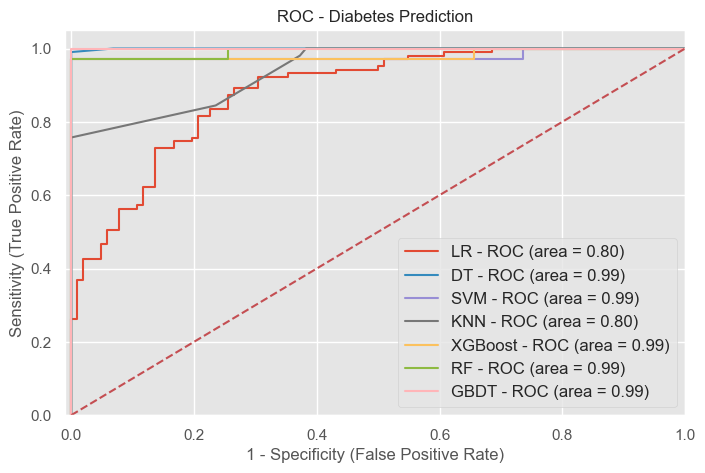

In [72]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dt,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xg,
},
{
    'label': 'RF',
    'model': rf,
},
{
    'label': 'GBDT',
    'model': gb,
}]

for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test, model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Diabetes Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_heart.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

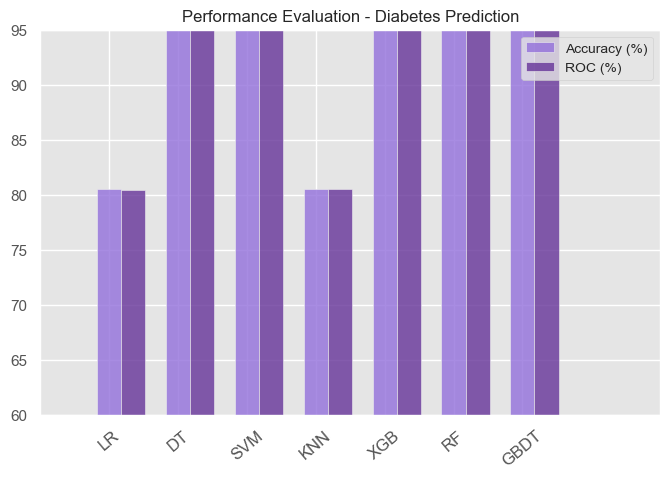

In [73]:
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dt,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xg,
},
{
    'label': 'RF',
    'model': rf,
},
{
    'label': 'GBDT',
    'model': gb,
}
]

means_roc = []
means_accuracy = [100*round(lr_acc,4), 100*round(dt_acc,4), 100*round(svc_acc,4), 100*round(knn_acc,4), 100*round(xg_acc,4), 
                  100*round(rf_acc,4), 100*round(gb_acc,4)]

for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)


#data to plot
n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

#create plot
fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([60, 95])

plt.title('Performance Evaluation - Diabetes Prediction', fontsize=12)
plt.xticks(index, ('LR', 'DT', 'SVM', 'KNN', 'XGB' , 'RF', 'GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("PE_heart.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

In [74]:
#saving the model
import pickle
model = gb
pickle.dump(model, open("heart.pkl",'wb'))